In [84]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [48]:
df = pd.read_csv("kmeans.csv")

In [49]:
df.rename(columns={'Danceability_scaled': 'Danceability', 'Loudness_scaled': 'Loudness'}, inplace=True)
df

,Track,Danceability,Loudness,Cluster
0,Feel Good Inc.,1.198765,0.175395,1
1,Rhinestone Eyes,0.312853,0.388378,1
2,New Gold (feat. Tame Impala and Bootie Brown),0.431390,0.853047,1
3,Clint Eastwood,0.231748,-0.304803,1
4,DARE,0.836913,0.379258,1
...,...,...,...,...
17062,JUST DANCE HARDSTYLE,-0.273596,0.257976,0
17063,SET FIRE TO THE RAIN HARDSTYLE,-0.591776,1.381561,0
17064,OUTSIDE HARDSTYLE SPED UP,-1.140792,0.668412,0
17065,ONLY GIRL HARDSTYLE,-1.303001,0.834805,0


In [ ]:
X = df[['Danceability', 'Loudness']]
y = df['Cluster']

# Розділення на навчальну і тестову вибіркиі
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Прогнозування та обчислення точності
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точність класифікації з лінійним ядром:", accuracy)


Точність класифікації з лінійним ядром: 0.9997070884592852


d:\University\third_course\thirdcourse2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


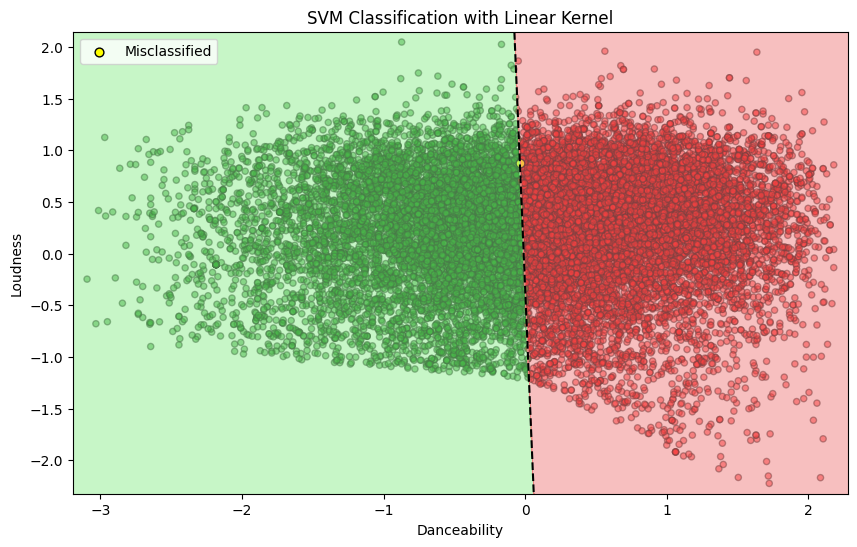

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Danceability'], X['Loudness'], c=y, cmap=ListedColormap(['green', 'red']), edgecolor='k', s=20, alpha=0.5)  


x_min, x_max = X['Danceability'].min() - 0.1, X['Danceability'].max() + 0.1
y_min, y_max = X['Loudness'].min() - 0.1, X['Loudness'].max() + 0.1

# Візуалізуємо розділяючу лінію
w = model.coef_[0]
b = model.intercept_[0]

x_line = np.linspace(x_min, x_max)
y_line = - (w[0] * x_line + b) / w[1]

plt.plot(x_line, y_line, 'k--')  

# Виділяємо неправильно визначені кластери
misclassified_indices = np.where(y_pred != y_test)[0]
plt.scatter(X_test.iloc[misclassified_indices]['Danceability'], X_test.iloc[misclassified_indices]['Loudness'], 
            color='yellow', edgecolor='k', s=40, label='Misclassified', alpha=1)

# Візуалізовуємо області кластерів
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['lightgreen', 'lightcoral'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)


plt.ylim(y_min, y_max)
plt.xlabel('Danceability')
plt.ylabel('Loudness')
plt.title('SVM Classification with Linear Kernel')
plt.legend()
plt.show()